## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import torch
import torch.nn as nn

## Parameters

In [2]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

EPOCHS = 5000
TEST_SIZE = 0.2

## Data loading and visualization

In [3]:
data_df = pd.read_csv("wine.csv",header = None)
data_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    int64  
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    int64  
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
1,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
2,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
3,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
4,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
5,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
6,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
7,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
8,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
9,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [6]:
for col in data_df.columns:
    print("col: ",col," | ",data_df[col].unique())

col:  0  |  [14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]
col:  1  |  [1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99 3.84 1.89 3.98 4.04 3.59 2.02 1.75 1.

In [7]:
data_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
1,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
2,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
3,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
4,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
5,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
6,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
7,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
8,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
9,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<Axes: >

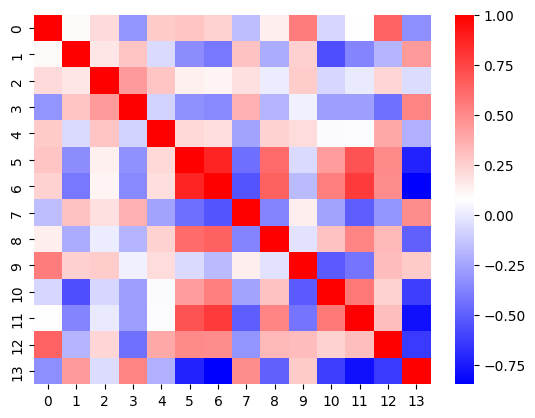

In [8]:
sns.heatmap(data_df.corr(), cmap ='bwr')

## Data preprocessing

In [9]:
features_df = data_df.drop(13,axis=1)
labels = data_df.iloc[:,13]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features_df,labels,shuffle=True,test_size=TEST_SIZE, stratify=labels)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [11]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [12]:
train_X = torch.tensor(X_train, dtype=torch.float32)
test_X = torch.tensor(X_test, dtype=torch.float32)

train_y = torch.tensor(y_train, dtype=torch.int64)
test_y = torch.tensor(y_test, dtype=torch.int64)

## Building model

In [13]:
model = nn.Sequential(
    nn.Linear(X_train.shape[1],8),
    nn.ReLU(),
    nn.Linear(8,3)
)
model

Sequential(
  (0): Linear(in_features=13, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=3, bias=True)
)

In [14]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

## try testing model

In [15]:
pred = model(train_X[:1])
pred

tensor([[ 0.3531, -0.3311, -0.2378]], grad_fn=<AddmmBackward0>)

In [16]:
loss_fn(pred,train_y[:1]).detach().numpy().item()
#loss_fn(pred,train_y[:1]).detach().item()

1.4061098098754883

## Training model

In [17]:
train_loss = []
test_loss = []

for epoch in range(EPOCHS):
    model.train()
    outputs = model(train_X)
    loss = loss_fn(outputs,train_y)
    
    train_loss.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        model.eval()
        outputs = model(test_X)
        tloss = loss_fn(outputs,test_y)
        test_loss.append(tloss.item())
    print(f"Epoch : {epoch:2d} Loss : {loss:.6f}|{tloss:.6f}")

Epoch :  0 Loss : 1.111255|1.068801
Epoch :  1 Loss : 1.105234|1.062945
Epoch :  2 Loss : 1.099229|1.057132
Epoch :  3 Loss : 1.093264|1.051419
Epoch :  4 Loss : 1.087360|1.045748
Epoch :  5 Loss : 1.081564|1.040152
Epoch :  6 Loss : 1.075865|1.034601
Epoch :  7 Loss : 1.070224|1.029071
Epoch :  8 Loss : 1.064645|1.023564
Epoch :  9 Loss : 1.059099|1.018079
Epoch : 10 Loss : 1.053596|1.012593
Epoch : 11 Loss : 1.048130|1.007113
Epoch : 12 Loss : 1.042694|1.001605
Epoch : 13 Loss : 1.037295|0.996111
Epoch : 14 Loss : 1.031916|0.990646
Epoch : 15 Loss : 1.026543|0.985250
Epoch : 16 Loss : 1.021214|0.979895
Epoch : 17 Loss : 1.015912|0.974546
Epoch : 18 Loss : 1.010662|0.969207
Epoch : 19 Loss : 1.005441|0.963880
Epoch : 20 Loss : 1.000236|0.958562
Epoch : 21 Loss : 0.995075|0.953252
Epoch : 22 Loss : 0.989961|0.947954
Epoch : 23 Loss : 0.984871|0.942803
Epoch : 24 Loss : 0.979812|0.937659
Epoch : 25 Loss : 0.974758|0.932537
Epoch : 26 Loss : 0.969711|0.927447
Epoch : 27 Loss : 0.964672|0

Epoch : 292 Loss : 0.129747|0.123857
Epoch : 293 Loss : 0.128950|0.123173
Epoch : 294 Loss : 0.128162|0.122496
Epoch : 295 Loss : 0.127382|0.121827
Epoch : 296 Loss : 0.126611|0.121165
Epoch : 297 Loss : 0.125848|0.120508
Epoch : 298 Loss : 0.125093|0.119857
Epoch : 299 Loss : 0.124345|0.119212
Epoch : 300 Loss : 0.123605|0.118573
Epoch : 301 Loss : 0.122873|0.117940
Epoch : 302 Loss : 0.122149|0.117313
Epoch : 303 Loss : 0.121434|0.116694
Epoch : 304 Loss : 0.120724|0.116082
Epoch : 305 Loss : 0.120021|0.115476
Epoch : 306 Loss : 0.119327|0.114876
Epoch : 307 Loss : 0.118639|0.114281
Epoch : 308 Loss : 0.117959|0.113690
Epoch : 309 Loss : 0.117285|0.113105
Epoch : 310 Loss : 0.116617|0.112526
Epoch : 311 Loss : 0.115957|0.111951
Epoch : 312 Loss : 0.115303|0.111381
Epoch : 313 Loss : 0.114655|0.110816
Epoch : 314 Loss : 0.114016|0.110258
Epoch : 315 Loss : 0.113381|0.109706
Epoch : 316 Loss : 0.112753|0.109159
Epoch : 317 Loss : 0.112131|0.108616
Epoch : 318 Loss : 0.111516|0.108078
E

Epoch : 571 Loss : 0.043725|0.046670
Epoch : 572 Loss : 0.043607|0.046565
Epoch : 573 Loss : 0.043489|0.046459
Epoch : 574 Loss : 0.043371|0.046354
Epoch : 575 Loss : 0.043254|0.046249
Epoch : 576 Loss : 0.043138|0.046145
Epoch : 577 Loss : 0.043022|0.046042
Epoch : 578 Loss : 0.042906|0.045938
Epoch : 579 Loss : 0.042792|0.045835
Epoch : 580 Loss : 0.042677|0.045732
Epoch : 581 Loss : 0.042563|0.045630
Epoch : 582 Loss : 0.042450|0.045529
Epoch : 583 Loss : 0.042337|0.045428
Epoch : 584 Loss : 0.042224|0.045327
Epoch : 585 Loss : 0.042112|0.045227
Epoch : 586 Loss : 0.042001|0.045127
Epoch : 587 Loss : 0.041890|0.045028
Epoch : 588 Loss : 0.041779|0.044929
Epoch : 589 Loss : 0.041669|0.044831
Epoch : 590 Loss : 0.041559|0.044733
Epoch : 591 Loss : 0.041450|0.044635
Epoch : 592 Loss : 0.041341|0.044537
Epoch : 593 Loss : 0.041233|0.044440
Epoch : 594 Loss : 0.041125|0.044344
Epoch : 595 Loss : 0.041018|0.044248
Epoch : 596 Loss : 0.040911|0.044153
Epoch : 597 Loss : 0.040804|0.044057
E

Epoch : 855 Loss : 0.022673|0.027612
Epoch : 856 Loss : 0.022622|0.027556
Epoch : 857 Loss : 0.022572|0.027500
Epoch : 858 Loss : 0.022521|0.027443
Epoch : 859 Loss : 0.022471|0.027386
Epoch : 860 Loss : 0.022420|0.027330
Epoch : 861 Loss : 0.022370|0.027273
Epoch : 862 Loss : 0.022320|0.027218
Epoch : 863 Loss : 0.022270|0.027162
Epoch : 864 Loss : 0.022220|0.027107
Epoch : 865 Loss : 0.022171|0.027052
Epoch : 866 Loss : 0.022121|0.026997
Epoch : 867 Loss : 0.022072|0.026942
Epoch : 868 Loss : 0.022022|0.026888
Epoch : 869 Loss : 0.021973|0.026834
Epoch : 870 Loss : 0.021924|0.026780
Epoch : 871 Loss : 0.021875|0.026726
Epoch : 872 Loss : 0.021827|0.026673
Epoch : 873 Loss : 0.021778|0.026620
Epoch : 874 Loss : 0.021730|0.026568
Epoch : 875 Loss : 0.021681|0.026516
Epoch : 876 Loss : 0.021633|0.026464
Epoch : 877 Loss : 0.021585|0.026412
Epoch : 878 Loss : 0.021537|0.026360
Epoch : 879 Loss : 0.021490|0.026309
Epoch : 880 Loss : 0.021442|0.026257
Epoch : 881 Loss : 0.021395|0.026206
E

Epoch : 1147 Loss : 0.012521|0.017450
Epoch : 1148 Loss : 0.012499|0.017428
Epoch : 1149 Loss : 0.012478|0.017407
Epoch : 1150 Loss : 0.012457|0.017385
Epoch : 1151 Loss : 0.012436|0.017364
Epoch : 1152 Loss : 0.012415|0.017343
Epoch : 1153 Loss : 0.012394|0.017322
Epoch : 1154 Loss : 0.012374|0.017301
Epoch : 1155 Loss : 0.012353|0.017280
Epoch : 1156 Loss : 0.012332|0.017258
Epoch : 1157 Loss : 0.012311|0.017237
Epoch : 1158 Loss : 0.012291|0.017216
Epoch : 1159 Loss : 0.012271|0.017195
Epoch : 1160 Loss : 0.012250|0.017174
Epoch : 1161 Loss : 0.012229|0.017153
Epoch : 1162 Loss : 0.012208|0.017133
Epoch : 1163 Loss : 0.012188|0.017112
Epoch : 1164 Loss : 0.012168|0.017091
Epoch : 1165 Loss : 0.012147|0.017070
Epoch : 1166 Loss : 0.012127|0.017050
Epoch : 1167 Loss : 0.012107|0.017029
Epoch : 1168 Loss : 0.012087|0.017008
Epoch : 1169 Loss : 0.012067|0.016988
Epoch : 1170 Loss : 0.012046|0.016967
Epoch : 1171 Loss : 0.012026|0.016947
Epoch : 1172 Loss : 0.012006|0.016927
Epoch : 1173

Epoch : 1433 Loss : 0.008006|0.012792
Epoch : 1434 Loss : 0.007994|0.012780
Epoch : 1435 Loss : 0.007983|0.012768
Epoch : 1436 Loss : 0.007971|0.012756
Epoch : 1437 Loss : 0.007959|0.012744
Epoch : 1438 Loss : 0.007948|0.012732
Epoch : 1439 Loss : 0.007936|0.012720
Epoch : 1440 Loss : 0.007925|0.012709
Epoch : 1441 Loss : 0.007913|0.012697
Epoch : 1442 Loss : 0.007902|0.012685
Epoch : 1443 Loss : 0.007890|0.012673
Epoch : 1444 Loss : 0.007879|0.012662
Epoch : 1445 Loss : 0.007867|0.012650
Epoch : 1446 Loss : 0.007856|0.012638
Epoch : 1447 Loss : 0.007845|0.012626
Epoch : 1448 Loss : 0.007834|0.012614
Epoch : 1449 Loss : 0.007822|0.012603
Epoch : 1450 Loss : 0.007811|0.012591
Epoch : 1451 Loss : 0.007800|0.012580
Epoch : 1452 Loss : 0.007789|0.012568
Epoch : 1453 Loss : 0.007777|0.012557
Epoch : 1454 Loss : 0.007766|0.012545
Epoch : 1455 Loss : 0.007755|0.012534
Epoch : 1456 Loss : 0.007744|0.012522
Epoch : 1457 Loss : 0.007732|0.012511
Epoch : 1458 Loss : 0.007721|0.012499
Epoch : 1459

Epoch : 1706 Loss : 0.005509|0.010067
Epoch : 1707 Loss : 0.005502|0.010057
Epoch : 1708 Loss : 0.005495|0.010048
Epoch : 1709 Loss : 0.005488|0.010039
Epoch : 1710 Loss : 0.005481|0.010030
Epoch : 1711 Loss : 0.005474|0.010020
Epoch : 1712 Loss : 0.005467|0.010011
Epoch : 1713 Loss : 0.005460|0.010002
Epoch : 1714 Loss : 0.005453|0.009993
Epoch : 1715 Loss : 0.005446|0.009984
Epoch : 1716 Loss : 0.005439|0.009975
Epoch : 1717 Loss : 0.005432|0.009965
Epoch : 1718 Loss : 0.005425|0.009956
Epoch : 1719 Loss : 0.005418|0.009946
Epoch : 1720 Loss : 0.005411|0.009937
Epoch : 1721 Loss : 0.005404|0.009928
Epoch : 1722 Loss : 0.005397|0.009919
Epoch : 1723 Loss : 0.005390|0.009910
Epoch : 1724 Loss : 0.005383|0.009901
Epoch : 1725 Loss : 0.005377|0.009892
Epoch : 1726 Loss : 0.005370|0.009882
Epoch : 1727 Loss : 0.005363|0.009873
Epoch : 1728 Loss : 0.005356|0.009864
Epoch : 1729 Loss : 0.005349|0.009855
Epoch : 1730 Loss : 0.005343|0.009846
Epoch : 1731 Loss : 0.005336|0.009838
Epoch : 1732

Epoch : 2000 Loss : 0.003853|0.007869
Epoch : 2001 Loss : 0.003849|0.007863
Epoch : 2002 Loss : 0.003844|0.007857
Epoch : 2003 Loss : 0.003840|0.007851
Epoch : 2004 Loss : 0.003835|0.007845
Epoch : 2005 Loss : 0.003831|0.007839
Epoch : 2006 Loss : 0.003827|0.007834
Epoch : 2007 Loss : 0.003822|0.007828
Epoch : 2008 Loss : 0.003818|0.007822
Epoch : 2009 Loss : 0.003813|0.007816
Epoch : 2010 Loss : 0.003809|0.007810
Epoch : 2011 Loss : 0.003805|0.007804
Epoch : 2012 Loss : 0.003800|0.007798
Epoch : 2013 Loss : 0.003796|0.007792
Epoch : 2014 Loss : 0.003792|0.007786
Epoch : 2015 Loss : 0.003787|0.007781
Epoch : 2016 Loss : 0.003783|0.007775
Epoch : 2017 Loss : 0.003779|0.007769
Epoch : 2018 Loss : 0.003774|0.007763
Epoch : 2019 Loss : 0.003770|0.007758
Epoch : 2020 Loss : 0.003766|0.007752
Epoch : 2021 Loss : 0.003761|0.007746
Epoch : 2022 Loss : 0.003757|0.007740
Epoch : 2023 Loss : 0.003753|0.007735
Epoch : 2024 Loss : 0.003748|0.007729
Epoch : 2025 Loss : 0.003744|0.007723
Epoch : 2026

Epoch : 2274 Loss : 0.002850|0.006514
Epoch : 2275 Loss : 0.002847|0.006510
Epoch : 2276 Loss : 0.002844|0.006506
Epoch : 2277 Loss : 0.002841|0.006502
Epoch : 2278 Loss : 0.002838|0.006498
Epoch : 2279 Loss : 0.002835|0.006493
Epoch : 2280 Loss : 0.002832|0.006489
Epoch : 2281 Loss : 0.002829|0.006485
Epoch : 2282 Loss : 0.002826|0.006481
Epoch : 2283 Loss : 0.002823|0.006477
Epoch : 2284 Loss : 0.002820|0.006473
Epoch : 2285 Loss : 0.002817|0.006469
Epoch : 2286 Loss : 0.002815|0.006465
Epoch : 2287 Loss : 0.002812|0.006461
Epoch : 2288 Loss : 0.002809|0.006457
Epoch : 2289 Loss : 0.002806|0.006453
Epoch : 2290 Loss : 0.002803|0.006449
Epoch : 2291 Loss : 0.002800|0.006445
Epoch : 2292 Loss : 0.002797|0.006441
Epoch : 2293 Loss : 0.002794|0.006437
Epoch : 2294 Loss : 0.002791|0.006433
Epoch : 2295 Loss : 0.002788|0.006428
Epoch : 2296 Loss : 0.002785|0.006424
Epoch : 2297 Loss : 0.002782|0.006420
Epoch : 2298 Loss : 0.002779|0.006417
Epoch : 2299 Loss : 0.002776|0.006413
Epoch : 2300

Epoch : 2560 Loss : 0.002133|0.005523
Epoch : 2561 Loss : 0.002131|0.005520
Epoch : 2562 Loss : 0.002129|0.005517
Epoch : 2563 Loss : 0.002127|0.005514
Epoch : 2564 Loss : 0.002125|0.005511
Epoch : 2565 Loss : 0.002122|0.005508
Epoch : 2566 Loss : 0.002120|0.005506
Epoch : 2567 Loss : 0.002118|0.005503
Epoch : 2568 Loss : 0.002116|0.005500
Epoch : 2569 Loss : 0.002114|0.005497
Epoch : 2570 Loss : 0.002112|0.005494
Epoch : 2571 Loss : 0.002110|0.005491
Epoch : 2572 Loss : 0.002108|0.005488
Epoch : 2573 Loss : 0.002106|0.005486
Epoch : 2574 Loss : 0.002104|0.005483
Epoch : 2575 Loss : 0.002102|0.005480
Epoch : 2576 Loss : 0.002100|0.005477
Epoch : 2577 Loss : 0.002098|0.005474
Epoch : 2578 Loss : 0.002096|0.005471
Epoch : 2579 Loss : 0.002094|0.005468
Epoch : 2580 Loss : 0.002092|0.005466
Epoch : 2581 Loss : 0.002090|0.005463
Epoch : 2582 Loss : 0.002088|0.005460
Epoch : 2583 Loss : 0.002086|0.005457
Epoch : 2584 Loss : 0.002084|0.005454
Epoch : 2585 Loss : 0.002082|0.005451
Epoch : 2586

Epoch : 2862 Loss : 0.001604|0.004769
Epoch : 2863 Loss : 0.001603|0.004767
Epoch : 2864 Loss : 0.001602|0.004765
Epoch : 2865 Loss : 0.001600|0.004763
Epoch : 2866 Loss : 0.001599|0.004761
Epoch : 2867 Loss : 0.001597|0.004759
Epoch : 2868 Loss : 0.001596|0.004757
Epoch : 2869 Loss : 0.001594|0.004755
Epoch : 2870 Loss : 0.001593|0.004752
Epoch : 2871 Loss : 0.001591|0.004750
Epoch : 2872 Loss : 0.001590|0.004748
Epoch : 2873 Loss : 0.001589|0.004746
Epoch : 2874 Loss : 0.001587|0.004744
Epoch : 2875 Loss : 0.001586|0.004742
Epoch : 2876 Loss : 0.001584|0.004740
Epoch : 2877 Loss : 0.001583|0.004738
Epoch : 2878 Loss : 0.001581|0.004736
Epoch : 2879 Loss : 0.001580|0.004733
Epoch : 2880 Loss : 0.001578|0.004731
Epoch : 2881 Loss : 0.001577|0.004729
Epoch : 2882 Loss : 0.001576|0.004727
Epoch : 2883 Loss : 0.001574|0.004725
Epoch : 2884 Loss : 0.001573|0.004723
Epoch : 2885 Loss : 0.001571|0.004721
Epoch : 2886 Loss : 0.001570|0.004719
Epoch : 2887 Loss : 0.001568|0.004717
Epoch : 2888

Epoch : 3160 Loss : 0.001233|0.004219
Epoch : 3161 Loss : 0.001232|0.004218
Epoch : 3162 Loss : 0.001231|0.004216
Epoch : 3163 Loss : 0.001230|0.004215
Epoch : 3164 Loss : 0.001229|0.004213
Epoch : 3165 Loss : 0.001228|0.004211
Epoch : 3166 Loss : 0.001227|0.004210
Epoch : 3167 Loss : 0.001226|0.004208
Epoch : 3168 Loss : 0.001225|0.004206
Epoch : 3169 Loss : 0.001224|0.004205
Epoch : 3170 Loss : 0.001223|0.004203
Epoch : 3171 Loss : 0.001222|0.004202
Epoch : 3172 Loss : 0.001220|0.004200
Epoch : 3173 Loss : 0.001219|0.004199
Epoch : 3174 Loss : 0.001218|0.004197
Epoch : 3175 Loss : 0.001217|0.004196
Epoch : 3176 Loss : 0.001216|0.004194
Epoch : 3177 Loss : 0.001215|0.004192
Epoch : 3178 Loss : 0.001214|0.004191
Epoch : 3179 Loss : 0.001213|0.004189
Epoch : 3180 Loss : 0.001212|0.004188
Epoch : 3181 Loss : 0.001211|0.004186
Epoch : 3182 Loss : 0.001210|0.004184
Epoch : 3183 Loss : 0.001209|0.004183
Epoch : 3184 Loss : 0.001208|0.004181
Epoch : 3185 Loss : 0.001207|0.004180
Epoch : 3186

Epoch : 3442 Loss : 0.000974|0.003819
Epoch : 3443 Loss : 0.000973|0.003818
Epoch : 3444 Loss : 0.000972|0.003817
Epoch : 3445 Loss : 0.000971|0.003815
Epoch : 3446 Loss : 0.000971|0.003814
Epoch : 3447 Loss : 0.000970|0.003813
Epoch : 3448 Loss : 0.000969|0.003812
Epoch : 3449 Loss : 0.000968|0.003810
Epoch : 3450 Loss : 0.000967|0.003809
Epoch : 3451 Loss : 0.000967|0.003808
Epoch : 3452 Loss : 0.000966|0.003807
Epoch : 3453 Loss : 0.000965|0.003805
Epoch : 3454 Loss : 0.000964|0.003804
Epoch : 3455 Loss : 0.000964|0.003803
Epoch : 3456 Loss : 0.000963|0.003802
Epoch : 3457 Loss : 0.000962|0.003800
Epoch : 3458 Loss : 0.000961|0.003799
Epoch : 3459 Loss : 0.000960|0.003798
Epoch : 3460 Loss : 0.000960|0.003797
Epoch : 3461 Loss : 0.000959|0.003795
Epoch : 3462 Loss : 0.000958|0.003794
Epoch : 3463 Loss : 0.000957|0.003793
Epoch : 3464 Loss : 0.000957|0.003792
Epoch : 3465 Loss : 0.000956|0.003791
Epoch : 3466 Loss : 0.000955|0.003789
Epoch : 3467 Loss : 0.000954|0.003788
Epoch : 3468

Epoch : 3717 Loss : 0.000782|0.003518
Epoch : 3718 Loss : 0.000781|0.003517
Epoch : 3719 Loss : 0.000780|0.003516
Epoch : 3720 Loss : 0.000780|0.003515
Epoch : 3721 Loss : 0.000779|0.003514
Epoch : 3722 Loss : 0.000779|0.003513
Epoch : 3723 Loss : 0.000778|0.003512
Epoch : 3724 Loss : 0.000777|0.003511
Epoch : 3725 Loss : 0.000777|0.003510
Epoch : 3726 Loss : 0.000776|0.003509
Epoch : 3727 Loss : 0.000776|0.003508
Epoch : 3728 Loss : 0.000775|0.003507
Epoch : 3729 Loss : 0.000774|0.003506
Epoch : 3730 Loss : 0.000774|0.003505
Epoch : 3731 Loss : 0.000773|0.003504
Epoch : 3732 Loss : 0.000773|0.003503
Epoch : 3733 Loss : 0.000772|0.003502
Epoch : 3734 Loss : 0.000771|0.003501
Epoch : 3735 Loss : 0.000771|0.003500
Epoch : 3736 Loss : 0.000770|0.003499
Epoch : 3737 Loss : 0.000770|0.003498
Epoch : 3738 Loss : 0.000769|0.003497
Epoch : 3739 Loss : 0.000768|0.003496
Epoch : 3740 Loss : 0.000768|0.003495
Epoch : 3741 Loss : 0.000767|0.003494
Epoch : 3742 Loss : 0.000767|0.003494
Epoch : 3743

Epoch : 4010 Loss : 0.000624|0.003257
Epoch : 4011 Loss : 0.000624|0.003256
Epoch : 4012 Loss : 0.000623|0.003255
Epoch : 4013 Loss : 0.000623|0.003254
Epoch : 4014 Loss : 0.000622|0.003253
Epoch : 4015 Loss : 0.000622|0.003253
Epoch : 4016 Loss : 0.000621|0.003252
Epoch : 4017 Loss : 0.000621|0.003251
Epoch : 4018 Loss : 0.000620|0.003251
Epoch : 4019 Loss : 0.000620|0.003250
Epoch : 4020 Loss : 0.000620|0.003249
Epoch : 4021 Loss : 0.000619|0.003248
Epoch : 4022 Loss : 0.000619|0.003247
Epoch : 4023 Loss : 0.000618|0.003246
Epoch : 4024 Loss : 0.000618|0.003246
Epoch : 4025 Loss : 0.000617|0.003245
Epoch : 4026 Loss : 0.000617|0.003244
Epoch : 4027 Loss : 0.000616|0.003243
Epoch : 4028 Loss : 0.000616|0.003243
Epoch : 4029 Loss : 0.000615|0.003242
Epoch : 4030 Loss : 0.000615|0.003241
Epoch : 4031 Loss : 0.000614|0.003240
Epoch : 4032 Loss : 0.000614|0.003239
Epoch : 4033 Loss : 0.000613|0.003238
Epoch : 4034 Loss : 0.000613|0.003238
Epoch : 4035 Loss : 0.000613|0.003237
Epoch : 4036

Epoch : 4302 Loss : 0.000503|0.003043
Epoch : 4303 Loss : 0.000502|0.003043
Epoch : 4304 Loss : 0.000502|0.003042
Epoch : 4305 Loss : 0.000502|0.003041
Epoch : 4306 Loss : 0.000501|0.003040
Epoch : 4307 Loss : 0.000501|0.003040
Epoch : 4308 Loss : 0.000501|0.003039
Epoch : 4309 Loss : 0.000500|0.003038
Epoch : 4310 Loss : 0.000500|0.003038
Epoch : 4311 Loss : 0.000500|0.003037
Epoch : 4312 Loss : 0.000499|0.003036
Epoch : 4313 Loss : 0.000499|0.003036
Epoch : 4314 Loss : 0.000498|0.003035
Epoch : 4315 Loss : 0.000498|0.003034
Epoch : 4316 Loss : 0.000498|0.003034
Epoch : 4317 Loss : 0.000497|0.003033
Epoch : 4318 Loss : 0.000497|0.003032
Epoch : 4319 Loss : 0.000497|0.003032
Epoch : 4320 Loss : 0.000496|0.003031
Epoch : 4321 Loss : 0.000496|0.003030
Epoch : 4322 Loss : 0.000496|0.003030
Epoch : 4323 Loss : 0.000495|0.003029
Epoch : 4324 Loss : 0.000495|0.003029
Epoch : 4325 Loss : 0.000494|0.003028
Epoch : 4326 Loss : 0.000494|0.003027
Epoch : 4327 Loss : 0.000494|0.003026
Epoch : 4328

Epoch : 4588 Loss : 0.000409|0.002868
Epoch : 4589 Loss : 0.000409|0.002867
Epoch : 4590 Loss : 0.000409|0.002867
Epoch : 4591 Loss : 0.000409|0.002866
Epoch : 4592 Loss : 0.000408|0.002866
Epoch : 4593 Loss : 0.000408|0.002865
Epoch : 4594 Loss : 0.000408|0.002865
Epoch : 4595 Loss : 0.000407|0.002864
Epoch : 4596 Loss : 0.000407|0.002864
Epoch : 4597 Loss : 0.000407|0.002863
Epoch : 4598 Loss : 0.000407|0.002862
Epoch : 4599 Loss : 0.000406|0.002862
Epoch : 4600 Loss : 0.000406|0.002861
Epoch : 4601 Loss : 0.000406|0.002861
Epoch : 4602 Loss : 0.000405|0.002860
Epoch : 4603 Loss : 0.000405|0.002860
Epoch : 4604 Loss : 0.000405|0.002859
Epoch : 4605 Loss : 0.000405|0.002858
Epoch : 4606 Loss : 0.000404|0.002858
Epoch : 4607 Loss : 0.000404|0.002858
Epoch : 4608 Loss : 0.000404|0.002857
Epoch : 4609 Loss : 0.000403|0.002856
Epoch : 4610 Loss : 0.000403|0.002856
Epoch : 4611 Loss : 0.000403|0.002855
Epoch : 4612 Loss : 0.000403|0.002855
Epoch : 4613 Loss : 0.000402|0.002854
Epoch : 4614

Epoch : 4875 Loss : 0.000335|0.002719
Epoch : 4876 Loss : 0.000335|0.002719
Epoch : 4877 Loss : 0.000335|0.002718
Epoch : 4878 Loss : 0.000334|0.002718
Epoch : 4879 Loss : 0.000334|0.002717
Epoch : 4880 Loss : 0.000334|0.002717
Epoch : 4881 Loss : 0.000334|0.002716
Epoch : 4882 Loss : 0.000333|0.002716
Epoch : 4883 Loss : 0.000333|0.002715
Epoch : 4884 Loss : 0.000333|0.002715
Epoch : 4885 Loss : 0.000333|0.002714
Epoch : 4886 Loss : 0.000333|0.002714
Epoch : 4887 Loss : 0.000332|0.002714
Epoch : 4888 Loss : 0.000332|0.002713
Epoch : 4889 Loss : 0.000332|0.002713
Epoch : 4890 Loss : 0.000332|0.002712
Epoch : 4891 Loss : 0.000331|0.002712
Epoch : 4892 Loss : 0.000331|0.002711
Epoch : 4893 Loss : 0.000331|0.002710
Epoch : 4894 Loss : 0.000331|0.002710
Epoch : 4895 Loss : 0.000330|0.002710
Epoch : 4896 Loss : 0.000330|0.002709
Epoch : 4897 Loss : 0.000330|0.002709
Epoch : 4898 Loss : 0.000330|0.002708
Epoch : 4899 Loss : 0.000330|0.002708
Epoch : 4900 Loss : 0.000329|0.002707
Epoch : 4901

<Axes: >

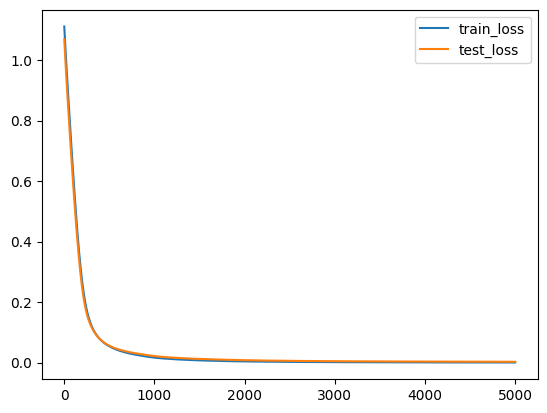

In [23]:
loss_df = pd.DataFrame({"train_loss":train_loss,"test_loss":test_loss})

loss_df.plot()

## Evaluate

In [18]:
pred = model(test_X)
y_pred = pred.detach().numpy().argmax(axis=1)

In [19]:
accuracy_score(y_test, y_pred)

1.0

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [21]:
confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]], dtype=int64)